In [1]:
from import_library import *
import seaborn as sb

In [2]:
save_path = 'Results/'

In [3]:
# Pie Chart
# Function for Data Visualization
def PieChart(data, title,labels=None,legend_title=None,colors=None,save=False ):
    """
    Plot pie chart
    ----------
    Parameters (Attributes)    
    data : string
        relative path for the images files
    title_chart : string
        the title of the chart
    labels : list, default: None
        labels of the chart
    legendTitile: list ,default: None
        legends of the chart
    save: bool ,default = False
    ------
    Returns:    
    The plot
    ------
    Example:
    apr_2010_sum = apr_2010['Total'].sum()
    pieChartTitle = f'The Percentage of Categories in The April Sale ({apr_2010_sum}) 2010'
    legendTitile = 'Categories'
    colors = ['orange', 'green', 'red', 'pink', 'brown','cyan',blue]
    PieChart(percentage_cate_value,pieChartTitle,labels=category_list,legendTitile=legendTitile,colors)
    """
    def my_autopct1(x):
        '''
        invisible for partions less than 5%
        return (f'{x:.1f}% ({np.sum(data)*x/100:.0f})') if x > 5 else ''#\n
        '''    
        return (f'{x:.1f}% \n ({np.sum(data)*x/100:.1f})') if x > 5 else '' #\n

    plt.figure(figsize=(15,5))
    plt.pie(data, 
            autopct=my_autopct1, 
            colors=colors,
            labels=labels,
            explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05,0.05,0.05,0.05]

           )    
    plt.title(title)
    # plt.legend(labels,title= legend_title,
    #           loc="center left",
    #           bbox_to_anchor=(1, 0, 0.5, 1))
    if save:
        if not os.path.exists(f'{save_path}/Images/'):
            os.makedirs( f'{save_path}/Images/')        
        plt.savefig(f'{save_path}/Images/{title}.png')
    plt.show()
    return 

In [4]:
columns = [
    'Time',
    'Session',   # midi/ soir
    'Sale Types' # emporter / surplace / livraison
    'BO BUN',    # Boeuf, poulet, cha la lot(LL), crevets, tofu
    'COM',       # boeuf/ poulet / porc caramel/ LL / tofu
    'MI',
    'SOUPE',
    'NEMS',
    'SALAD',
    'ROULEAU',
]

In [5]:
file = 'Test_BunViet.csv'
data = pd.read_csv(file, sep=',',header = 0)
data = data[:8]
data

,FracNum,Ses,Types,BB,Q,P,BBN,Q.1,P.1,COM,...,ROULEAU,Q.8,P.8,DESSERTS,Q.9,P.9,BOISSONS,Q.10,P.10,Total
0,07122023-0-01,m,s,NaN,NaN,0.00,NaN,NaN,0.00,b,...,NaN,NaN,0.00,NaN,NaN,0.00,bc,2.00,7.00,38.30
1,07122023-0-02,m,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,NaN,0.00,NaN,NaN,0.00,jf,2.00,6.00,35.80
2,07122023-0-03,m,NaN,kcv,1.00,12.90,kcv,NaN,0.00,NaN,...,cv,4.00,10.00,NaN,NaN,0.00,NaN,NaN,0.00,45.90
3,07122023-0-03,m,NaN,b,1.00,9.50,b,NaN,0.00,NaN,...,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,9.50
4,07122023-0-04,m,NaN,NaN,NaN,0.00,NaN,NaN,0.00,pc,...,NaN,NaN,0.00,NaN,NaN,0.00,sd,1.00,2.50,21.40
5,07122023-0-04,m,NaN,NaN,NaN,0.00,NaN,NaN,0.00,ll,...,NaN,NaN,0.00,NaN,NaN,0.00,sd,1.00,2.50,21.40
6,07122023-0-05,m,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,...,b,1.00,2.50,NaN,NaN,0.00,sd,1.00,2.50,16.00
7,07122023-0-05,m,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,...,cv,1.00,2.50,NaN,NaN,0.00,bb,1.00,3.90,17.40


In [6]:
data.columns

Index(['FracNum', 'Ses', 'Types', 'BB', 'Q', 'P', 'BBN', 'Q.1', 'P.1', 'COM',
       'Q.2', 'P.2', 'MiTron', 'Q.3', 'P.3', 'MiXao', 'Q.4', 'P.4', 'SOUPE',
       'Q.5', 'P.5', 'NEMS', 'Q.6', 'P.6', 'SALAD', 'Q.7', 'P.7', 'ROULEAU',
       'Q.8', 'P.8', 'DESSERTS', 'Q.9', 'P.9', 'BOISSONS', 'Q.10', 'P.10',
       'Total'],
      dtype='object')

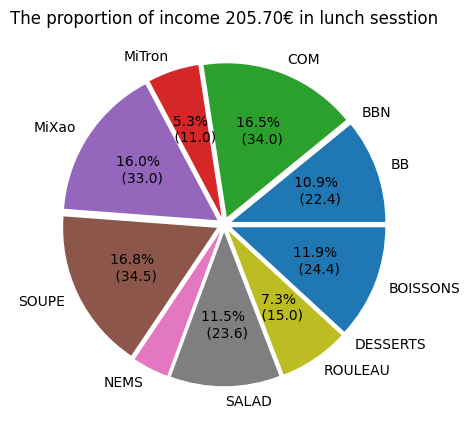

In [7]:
### The proportion of income 
# Total price - # Total Sale _ on place
price_list = [i for i in data.columns.to_list() if i[0]=='P']
total_price = data[price_list].sum()
# Pie chart
total = data['Total'].sum()
title = f'The proportion of income {total:.2f}€ in lunch sesstion'
labels = [i for i in data.columns.to_list() if i[0]!='P' and i[0]!='Q'][3:-1]
legend_title = 'The Dishes'
PieChart(total_price,title,labels=labels,legend_title=legend_title)

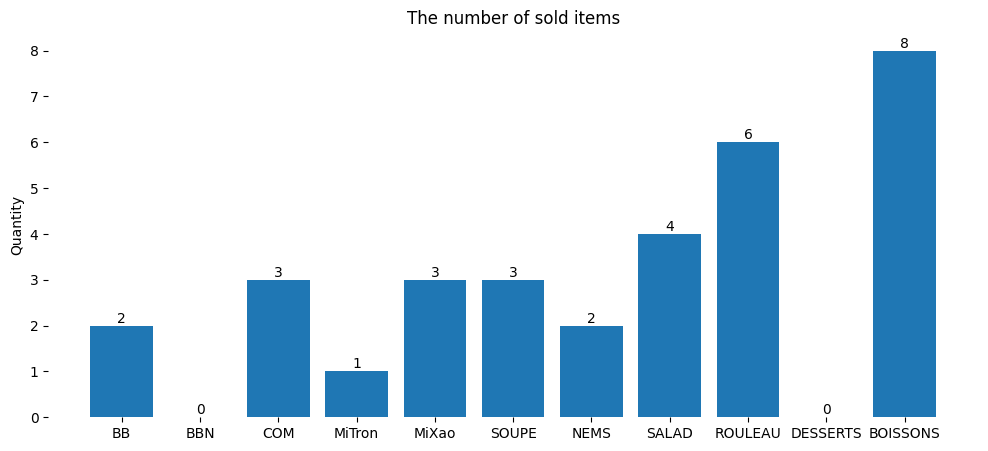

In [25]:
### The number of each item
item_list = [i for i in data.columns.to_list() if i[0]=='Q']
total_item = data[item_list].sum()
# BAR chart
fig, ax = plt.subplots(figsize=(12,5))
bar_container = ax.bar(labels, total_item)
ax.set(ylabel='Quantity', title='The number of sold items')
ax.bar_label(bar_container, fmt=lambda x: f'{x:.0f}')
# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

In [26]:
# Detailing the products
labels

['BB',
 'BBN',
 'COM',
 'MiTron',
 'MiXao',
 'SOUPE',
 'NEMS',
 'SALAD',
 'ROULEAU',
 'DESSERTS',
 'BOISSONS']

In [56]:
df = pd.DataFrame()
for cat in labels:
    dict = {
    "index": cat,
    "items": data[cat].value_counts(),}
    df_temps = pd.DataFrame(dict)
    df = pd.concat([df, df_temps])
df.reset_index(names=['item_names'],drop=False, inplace=True)
df.set_index('index')

,item_names,items
index,,
BB,kcv,1
BB,b,1
BBN,kcv,1
BBN,b,1
COM,b,1
COM,pc,1
COM,ll,1
MiTron,y,1
MiXao,b,2


In [35]:
df = pd.DataFrame()
for cat in labels:
    df_temps = pd.DataFrame(data[cat].value_counts())
    
    df = pd.concat([df, df_temps])